In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_squared_error, mean_absolute_percentage_error, r2_score, root_mean_squared_error)
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

#importing data
data=pd.read_csv(r'C:\Users\Admin\Desktop\DV assignments\ADS\insurance.csv')

# Data Inspection

In [2]:
print(data.head())
print(data.columns)
print(data.info())  # no null or no missing values in any features/columns


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


# Exploring and Detecting Outlier 

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x24d6c1ac460>,
 'caps': [<matplotlib.lines.Line2D at 0x24d6c25dc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d6c1ac700>],
 'medians': [<matplotlib.lines.Line2D at 0x24d6e4695e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d6e8900a0>],
 'means': []}

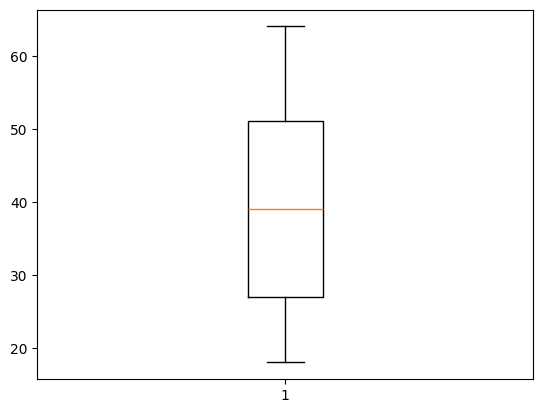

In [20]:
# For Discrete Variables
#1.Age
data['age'].value_counts()
print(data['age'].describe())

plt.boxplot(data['age'])
#no outliers found as the min and max ages falls with in the range

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


{'whiskers': [<matplotlib.lines.Line2D at 0x24d697d02e0>,
 'caps': [<matplotlib.lines.Line2D at 0x24d697d06a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d697c2f70>],
 'medians': [<matplotlib.lines.Line2D at 0x24d697d0be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d697d0e80>],
 'means': []}

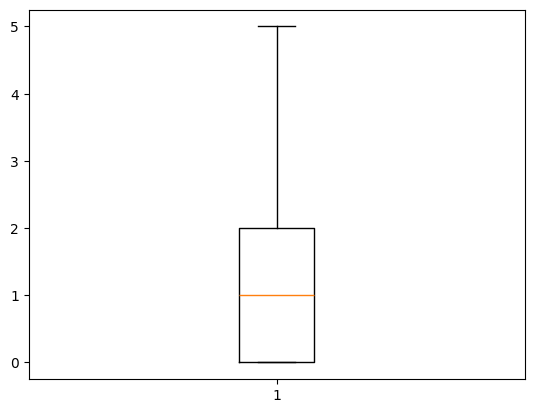

In [ ]:
#2.Children
print(data['children'].value_counts())
plt.boxplot(data['children'])

#no outliers found as all the data points lie within the outlier bounds


13.7
47.290000000000006
0.25    26.29625
0.50    30.40000
0.75    34.69375
0.90    38.61950
1.00    53.13000
Name: bmi, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x24d6983d9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x24d6983df10>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d6983d730>],
 'medians': [<matplotlib.lines.Line2D at 0x24d6984c370>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d6984c610>],
 'means': []}

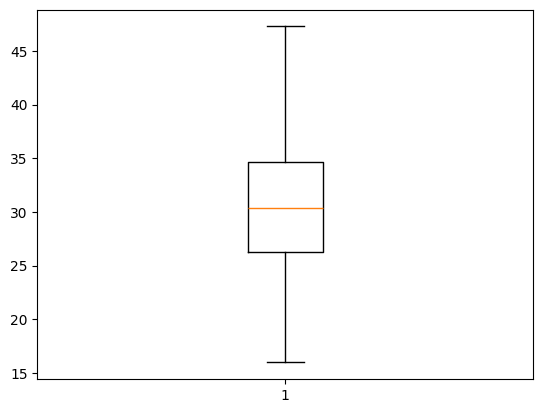

In [ ]:
#For continous Variables
#1.bmi
# Calculate IQR for 'bmi'
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

#checking through quantiles
print(data['bmi'].quantile([0.25,0.5,0.75,0.9,1]))

#replacing values less than lower bound with lower_bound and greater than upper bound with upper_bound
data['bmi']=data['bmi'].apply(lambda x: lower_bound if x < lower_bound else x)
data['bmi']=data['bmi'].apply(lambda x: upper_bound if x > upper_bound else x)

#visualzing through boxplot
plt.boxplot(data['bmi'])


-13109.1508975
34489.350562499996


{'whiskers': [<matplotlib.lines.Line2D at 0x24d698b72b0>,
 'caps': [<matplotlib.lines.Line2D at 0x24d698b7700>,
 'boxes': [<matplotlib.lines.Line2D at 0x24d698aafd0>],
 'medians': [<matplotlib.lines.Line2D at 0x24d698b7c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x24d698b7ee0>],
 'means': []}

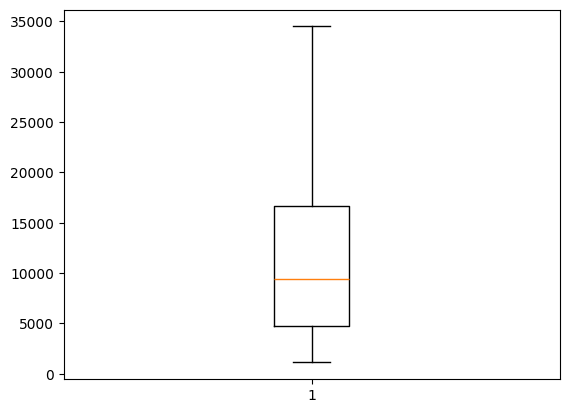

In [6]:
#2.Target Variable - Charges
#Calculating the IQR
Q1 = data['charges'].quantile(0.25)
Q3 = data['charges'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

#quantile distribution
data['charges'].quantile([0.25,0.5,0.75,0.9,1])

#treating the outliers 
data['charges']= data['charges'].apply(lambda x: upper_bound if x>upper_bound else x)
#only treating the upper bound as charges cannot be negative in nature

#visualizing
plt.boxplot(data['charges'])

# Encoding the Variables

In [7]:
#1.sex
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['sex_encoded']=le.fit_transform(data['sex'])

#2.smoker
le=LabelEncoder()
data['smoke_encoded']=le.fit_transform(data['smoker'])
#I have used label encoding and sex, smoker variables as they have only 2 categories



# Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
numeric = data[['age', 'bmi', 'children', 'charges']]
ss = StandardScaler(with_mean=True, with_std=True)
scaled = ss.fit_transform(numeric)

#concatenating with original data
scaled_df = pd.DataFrame(scaled, columns=['age_scaled', 'bmi_scaled', 'children_scaled', 'charges_scaled'])
data = pd.concat([data, scaled_df], axis=1)

#3region
data=pd.get_dummies(data, columns=['region'],drop_first=True,dtype=int)


# Understanding Relationships

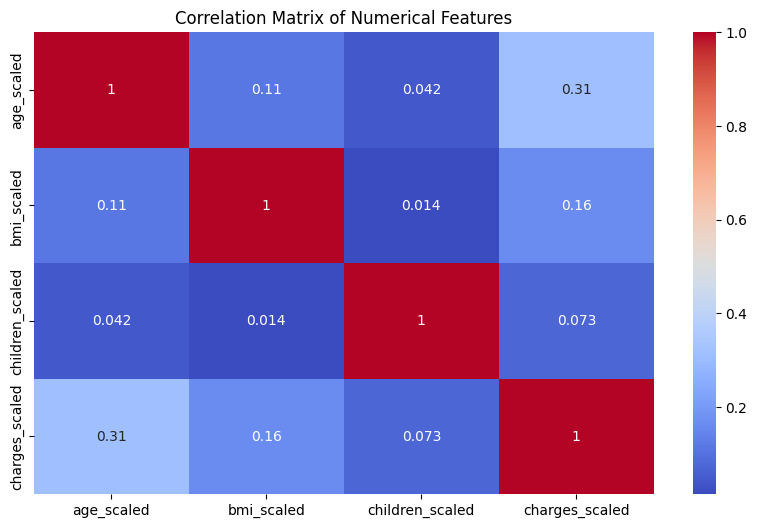

In [9]:
import seaborn as sns
numeric=data[['age_scaled','bmi_scaled','children_scaled', 'charges_scaled']]

#creating a correlation matrix
corr_mat=numeric.corr()

#visualizing through heatmaps
plt.figure(figsize=(10,6))
sns.heatmap(corr_mat,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Multiple Linear Regression Model Using OLS

In [10]:
features=data[['age_scaled', 'bmi_scaled', 'children_scaled',
    'sex_encoded', 'smoke_encoded',
    'region_northwest', 'region_southeast', 'region_southwest']]

#assigning x,y
x=features
y=data['charges_scaled']

#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#model building
model=LinearRegression(fit_intercept=True,copy_X=True)
model.fit(x_train,y_train)

#predict
y_train_preds=model.predict(x_train)
y_test_preds=model.predict(x_test)

# Evaluation metrics train 
mse_train = mean_squared_error(y_train,y_train_preds)
rmse_train = root_mean_squared_error(y_train,y_train_preds)
mape_train = mean_absolute_percentage_error(y_train,y_train_preds)
rsquared_train = r2_score(y_train,y_train_preds)
print(f"Train evaluation metrics - {mse_train,rmse_train,mape_train,rsquared_train}")

# Evaluation metrics test 
mse_test = mean_squared_error(y_test,y_test_preds)
rmse_test = root_mean_squared_error(y_test,y_test_preds)
mape_test = mean_absolute_percentage_error(y_test,y_test_preds)
rsquared = r2_score(y_test,y_test_preds)
print(f"Test evaluation metrics - {mse_test,rmse_test,mape_test,rsquared}")

adj_r2_train = 1 - (1-rsquared_train)*(x_train.shape[0]-1)/(x_train.shape[0]-1-1)
adj_r2_test = 1 - (1-rsquared)*(x_test.shape[0]-1)/(x_test.shape[0]-1-1)
print(f"adj rsuared for train {adj_r2_train} and test {adj_r2_test}")

Train evaluation metrics - (0.25879216499032587, 0.5087161929704281, 5.002380430308389, 0.7376387881253278)
Test evaluation metrics - (0.22730636445692912, 0.4767665722939572, 1.0800215572091196, 0.7841002156994548)
adj rsuared for train 0.737393131559902 and test 0.7832885623750167


# Multiple Regression using Gradient Descent

In [18]:
features=data[['age_scaled', 'bmi_scaled', 'children_scaled',
    'sex_encoded', 'smoke_encoded',
    'region_northwest', 'region_southeast', 'region_southwest']]

#assigning x,y
x=features
y=data['charges_scaled']

#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#model building
model=SGDRegressor(loss='squared_error',learning_rate='constant',eta0=0.2,max_iter=1000)
model.fit(x_train,y_train)

#predict
y_train_preds=model.predict(x_train)
y_test_preds=model.predict(x_test)

# Evaluation metrics train 
mse_train = mean_squared_error(y_train,y_train_preds)
rmse_train = root_mean_squared_error(y_train,y_train_preds)
mape_train = mean_absolute_percentage_error(y_train,y_train_preds)
rsquared_train = r2_score(y_train,y_train_preds)
print(f"Train evaluation metrics - {mse_train,rmse_train,mape_train,rsquared_train}")

# Evaluation metrics test 
mse_test = mean_squared_error(y_test,y_test_preds)
rmse_test = root_mean_squared_error(y_test,y_test_preds)
mape_test = mean_absolute_percentage_error(y_test,y_test_preds)
rsquared = r2_score(y_test,y_test_preds)
print(f"Test evaluation metrics - {mse_test,rmse_test,mape_test,rsquared}")

adj_r2_train = 1 - (1-rsquared_train)*(x_train.shape[0]-1)/(x_train.shape[0]-1-1)
adj_r2_test = 1 - (1-rsquared)*(x_test.shape[0]-1)/(x_test.shape[0]-1-1)
print(f"adj rsuared for train {adj_r2_train} and test {adj_r2_test}")




Train evaluation metrics - (1.715836725085559, 1.309899509537109, 78.55816996241364, -0.7395001219969088)
Test evaluation metrics - (1.5872774844471857, 1.2598720111373163, 4.633254315603142, -0.5076254786618359)
adj rsuared for train -0.7411288674294902 and test -0.5132932436192112


# Polynomial Regression Using GD

In [12]:
#assigning x,y
x=features
y=data['charges_scaled']

#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#model building
model=Pipeline([('poly',PolynomialFeatures(degree=2,include_bias=False)),('Gradient',SGDRegressor(loss='squared_error',learning_rate='constant',eta0=0.2,max_iter=1000))])
model.fit(x_train,y_train)

#predict
y_train_preds=model.predict(x_train)
y_test_preds=model.predict(x_test)

# Evaluation metrics train 
mse_train = mean_squared_error(y_train,y_train_preds)
rmse_train = root_mean_squared_error(y_train,y_train_preds)
mape_train = mean_absolute_percentage_error(y_train,y_train_preds)
rsquared_train = r2_score(y_train,y_train_preds)
print(f"Train evaluation metrics - {mse_train,rmse_train,mape_train,rsquared_train}")

# Evaluation metrics test 
mse_test = mean_squared_error(y_test,y_test_preds)
rmse_test = root_mean_squared_error(y_test,y_test_preds)
mape_test = mean_absolute_percentage_error(y_test,y_test_preds)
rsquared = r2_score(y_test,y_test_preds)
print(f"Test evaluation metrics - {mse_test,rmse_test,mape_test,rsquared}")

adj_r2_train = 1 - (1-rsquared_train)*(x_train.shape[0]-1)/(x_train.shape[0]-1-1)
adj_r2_test = 1 - (1-rsquared)*(x_test.shape[0]-1)/(x_test.shape[0]-1-1)
print(f"adj rsuared for train {adj_r2_train} and test {adj_r2_test}")

Train evaluation metrics - (4.7484293225860676e+24, 2179089103865.665, 38526179471261.72, -4.8139157212177575e+24)
Test evaluation metrics - (6.119130021268421e+24, 2473687535091.775, 13269841289101.893, -5.812062741204828e+24)
adj rsuared for train -4.8184231329417444e+24 and test -5.83391260113417e+24


# LASSO Regression

In [13]:
from sklearn.linear_model import Lasso

#assigning x,y
x=features
y=data['charges_scaled']

#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#model building
model=Lasso(alpha=0.1,max_iter=1000)
model.fit(x_train,y_train)

#predict
y_train_preds=model.predict(x_train)
y_test_preds=model.predict(x_test)

# Evaluation metrics train 
mse_train = mean_squared_error(y_train,y_train_preds)
rmse_train = root_mean_squared_error(y_train,y_train_preds)
mape_train = mean_absolute_percentage_error(y_train,y_train_preds)
rsquared_train = r2_score(y_train,y_train_preds)
print(f"Train evaluation metrics - {mse_train,rmse_train,mape_train,rsquared_train}")

# Evaluation metrics test 
mse_test = mean_squared_error(y_test,y_test_preds)
rmse_test = root_mean_squared_error(y_test,y_test_preds)
mape_test = mean_absolute_percentage_error(y_test,y_test_preds)
rsquared = r2_score(y_test,y_test_preds)
print(f"Test evaluation metrics - {mse_test,rmse_test,mape_test,rsquared}")

adj_r2_train = 1 - (1-rsquared_train)*(x_train.shape[0]-1)/(x_train.shape[0]-1-1)
adj_r2_test = 1 - (1-rsquared)*(x_test.shape[0]-1)/(x_test.shape[0]-1-1)
print(f"adj rsuared for train {adj_r2_train} and test {adj_r2_test}")

Train evaluation metrics - (0.3435269513095508, 0.5861117225491662, 3.3544929829423173, 0.6517354099164694)
Test evaluation metrics - (0.3316717798506434, 0.5759095240145308, 0.8068959194564157, 0.6849720160743658)
adj rsuared for train 0.6514093194763162 and test 0.6837877003453221


# RIDGE Regression

In [14]:
from sklearn.linear_model import Ridge

#assigning x,y
x=features
y=data['charges_scaled']

#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#model building
model=Ridge(alpha=0.1,max_iter=1000)
model.fit(x_train,y_train)

#predict
y_train_preds=model.predict(x_train)
y_test_preds=model.predict(x_test)

# Evaluation metrics train 
mse_train = mean_squared_error(y_train,y_train_preds)
rmse_train = root_mean_squared_error(y_train,y_train_preds)
mape_train = mean_absolute_percentage_error(y_train,y_train_preds)
rsquared_train = r2_score(y_train,y_train_preds)
print(f"Train evaluation metrics - {mse_train,rmse_train,mape_train,rsquared_train}")

# Evaluation metrics test 
mse_test = mean_squared_error(y_test,y_test_preds)
rmse_test = root_mean_squared_error(y_test,y_test_preds)
mape_test = mean_absolute_percentage_error(y_test,y_test_preds)
rsquared = r2_score(y_test,y_test_preds)
print(f"Test evaluation metrics - {mse_test,rmse_test,mape_test,rsquared}")

adj_r2_train = 1 - (1-rsquared_train)*(x_train.shape[0]-1)/(x_train.shape[0]-1-1)
adj_r2_test = 1 - (1-rsquared)*(x_test.shape[0]-1)/(x_test.shape[0]-1-1)
print(f"adj rsuared for train {adj_r2_train} and test {adj_r2_test}")

Train evaluation metrics - (0.25879237510236613, 0.5087163994824289, 4.997942103816738, 0.7376385751155965)
Test evaluation metrics - (0.22733769944777013, 0.47679943314539514, 1.0801148516649377, 0.7840704531462601)
adj rsuared for train 0.7373929183507235 and test 0.7832586879325243


# Elastic Net Regression

In [15]:
from sklearn.linear_model import ElasticNet

#assigning x,y
x=features
y=data['charges_scaled']

#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#model building
model=ElasticNet(alpha=0.2,l1_ratio=0.5,max_iter=1000)
model.fit(x_train,y_train)

#predict
y_train_preds=model.predict(x_train)
y_test_preds=model.predict(x_test)

# Evaluation metrics train 
mse_train = mean_squared_error(y_train,y_train_preds)
rmse_train = root_mean_squared_error(y_train,y_train_preds)
mape_train = mean_absolute_percentage_error(y_train,y_train_preds)
rsquared_train = r2_score(y_train,y_train_preds)
print(f"Train evaluation metrics - {mse_train,rmse_train,mape_train,rsquared_train}")

# Evaluation metrics test 
mse_test = mean_squared_error(y_test,y_test_preds)
rmse_test = root_mean_squared_error(y_test,y_test_preds)
mape_test = mean_absolute_percentage_error(y_test,y_test_preds)
rsquared = r2_score(y_test,y_test_preds)
print(f"Test evaluation metrics - {mse_test,rmse_test,mape_test,rsquared}")

adj_r2_train = 1 - (1-rsquared_train)*(x_train.shape[0]-1)/(x_train.shape[0]-1-1) 
adj_r2_test = 1 - (1-rsquared)*(x_test.shape[0]-1)/(x_test.shape[0]-1-1)
print(f"adj rsuared for train {adj_r2_train} and test {adj_r2_test}")

Train evaluation metrics - (0.4931474821042964, 0.7022446027591073, 1.4139198646551645, 0.5000514368637745)
Test evaluation metrics - (0.4990849627246232, 0.7064594558250482, 1.043964609260396, 0.525959882129437)
adj rsuared for train 0.49958332023162455 and test 0.5241777764231567


In [ ]:
#checking for missing values:
print(f"Missing values per column:")
print(df.isnull().sum())

#checking for outliers and unrealistic values in the columns age and experience:
cols = ['person_age', 'person_emp_exp']
for col in cols:
    print(f"{col} range: {df[col].min()} to {df[col].max()}")

#removing the outliers in the feature 'person age'
df_clean=df.copy()
#limit the maximum age to 80.
df_clean=df_clean[df_clean['person_age']<=80]
df_clean['person_age'].value_counts()
(df_clean['person_age'].quantile([0.25,0.5,0.75,0.90,0.95,0.99,1]))

#defining the outliers through IQR treatment
Q1 = df_clean['person_age'].quantile(0.25)
Q3 = df_clean['person_age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("\n lower bound for person_age:", lower_bound)
print("\n upper bound  for person_age:", upper_bound)

#handling the outliers
df_clean['person_age']=df_clean['person_age'].apply(lambda x: upper_bound if x>upper_bound else x )


#removing the outliers in the feature 'person_emp_exp'
#Employment experience greater than the person's age
df_clean = df_clean[df_clean['person_emp_exp'] <= df_clean['person_age']]
df_clean['person_emp_exp'].value_counts()

#defining the outliers through IQR treatment
Q1 = df_clean['person_emp_exp'].quantile(0.25)
Q3 = df_clean['person_emp_exp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("\n lower bound for person_emp_exp:", lower_bound)
print("\n upper bound for person_emp_exp:", upper_bound)

#handling the outliers
df_clean['person_emp_exp']=df_clean['person_emp_exp'].apply(lambda x: upper_bound if x>upper_bound else x )


plt.boxplot(df_clean[['person_age','person_emp_exp']])
#updating the cleaned to the original dataset
df=df_clean.copy()
